<a href="https://colab.research.google.com/github/sandeepss2020/Machine-Learning/blob/main/ML_lab7_ML_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Lab 7: Apply Logistic Regression classification algorithm to your data set and perform the following***
1. Find confusion matrix
2.Generate Classification report 
3. Interpret and visualize the results.

In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [ ]:
adult_df = pd.read_csv('adult.csv')
print("Number of Observations in adult dataset:", adult_df.shape)
adult_df.head()

Number of Observations in adult dataset: (46303, 16)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,Label
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0.0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0.0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0.0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0.0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0.0


In [ ]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46303 entries, 0 to 46302
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46303 non-null  int64  
 1   workclass       46303 non-null  object 
 2   fnlwgt          46303 non-null  int64  
 3   education       46303 non-null  object 
 4   education.num   46303 non-null  object 
 5   marital.status  46303 non-null  object 
 6   occupation      46303 non-null  object 
 7   relationship    46303 non-null  object 
 8   race            46303 non-null  object 
 9   sex             46303 non-null  object 
 10  capital.gain    46303 non-null  int64  
 11  capital.loss    46303 non-null  object 
 12  hours.per.week  46303 non-null  object 
 13  native.country  46303 non-null  object 
 14  income          46302 non-null  object 
 15  Label           46302 non-null  float64
dtypes: float64(1), int64(3), object(12)
memory usage: 5.7+ MB


In [ ]:
adult_df.describe()

,age,fnlwgt,capital.gain,Label
count,46303.000000,4.630300e+04,46303.000000,46302.000000
mean,38.382178,1.896699e+05,757.820530,0.226124
std,13.623544,1.056792e+05,6212.664575,0.418325
min,8.000000,6.000000e+00,0.000000,0.000000
25%,27.000000,1.176180e+05,0.000000,0.000000
50%,37.000000,1.784170e+05,0.000000,0.000000
75%,47.000000,2.368595e+05,0.000000,0.000000
max,90.000000,1.484705e+06,99999.000000,1.000000


In [ ]:
cat_col = adult_df.dtypes[adult_df.dtypes == "object"]
num_col = adult_df.dtypes[adult_df.dtypes != "object"]


In [ ]:
#Categorical
print(cat_col)
#Numerical
print(num_col)

NameError: ignored

In [ ]:
adult_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            1
Label             1
dtype: int64

In [ ]:
for col in list(cat_col.index):
    print(f"--------------------{col.title()}-------------------------")
    total= adult_df[col].value_counts()
    percent = adult_df[col].value_counts() / adult_df.shape[0]
    df = pd.concat([total,percent],keys = ['total','percent'],axis = 1)
    print(df)
    print('\n')

--------------------Workclass-------------------------
                  total   percent
Private           32407  0.699890
Self-emp-not-inc   3537  0.076388
Local-gov          2980  0.064359
?                  2637  0.056951
State-gov          1838  0.039695
Self-emp-inc       1521  0.032849
Federal-gov        1348  0.029113
Without-pay          23  0.000497
Never-worked         11  0.000238
10th                  1  0.000022


--------------------Education-------------------------
               total   percent
HS-grad        15015  0.324277
Some-college   10444  0.225558
Bachelors       7464  0.161199
Masters         2347  0.050688
Assoc-voc       1963  0.042395
11th            1704  0.036801
Assoc-acdm      1534  0.033130
10th            1359  0.029350
7th-8th          933  0.020150
Prof-school      762  0.016457
9th              759  0.016392
12th             657  0.014189
Doctorate        553  0.011943
5th-6th          485  0.010474
1st-4th          246  0.005313
Preschool         

In [ ]:
edit_cols = ['native.country','occupation','workclass']
# Replace ? with Unknown
for col in edit_cols:
    adult_df.loc[adult_df[col] == '?', col] = 'unknown'
# Check if ? is present
for col in edit_cols:
    print(f"? in {col}: {adult_df[(adult_df[col] == '?')].any().sum()}")

? in native.country: 0
? in occupation: 0
? in workclass: 0


In [ ]:
from pyparsing import replace_with
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th','Preschool']

#Replace
adult_df['education'].replace(to_replace = hs_grad, value = 'Hs-Grad' , inplace = True)
adult_df['education'].replace(to_replace = elementary, value = 'elementary_school', inplace = True)

adult_df['education'].value_counts()

Hs-Grad              19494
Some-college         10444
Bachelors             7464
Masters               2347
Assoc-voc             1963
elementary_school     1741
Assoc-acdm            1534
Prof-school            762
Doctorate              553
Never-married            1
Name: education, dtype: int64

In [ ]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
adult_df['marital.status'].replace(to_replace = married ,value = 'Married',inplace = True)
adult_df['marital.status'].replace(to_replace = separated,value = 'Separated',inplace = True)

adult_df['marital.status'].value_counts()

Married          21541
Never-married    15464
Separated         7876
Widowed           1421
Not-in-family        1
Name: marital.status, dtype: int64

In [ ]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
adult_df['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
adult_df['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

adult_df['workclass'].value_counts()

Private           32407
Govt_employees     6166
Self_employed      5058
unknown            2637
Without-pay          23
Never-worked         11
10th                  1
Name: workclass, dtype: int64

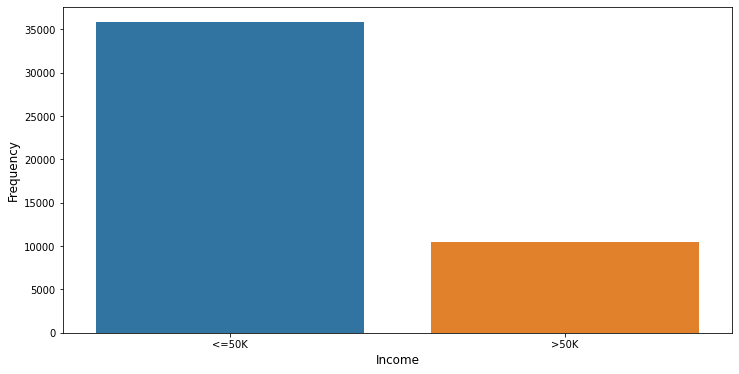

In [ ]:
plt.figure(figsize =(12,6));
sns.countplot(x = 'income', data = adult_df);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);

In [ ]:
#split dataset in features and target variable
feature_cols = ['workclass', 'education', 'marital.status', 'occupation','relationship','sex','hours.per.week']
X = adult_df[feature_cols] # Features
y = adult_df.Label # Target variable

# plt.plot(X, y)




In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [ ]:
adult_df['workclass'] = Le.fit_transform(adult_df['workclass'])
adult_df['education'] = Le.fit_transform(adult_df['education'])
adult_df['marital.status'] = Le.fit_transform(adult_df['marital.status'])
adult_df['occupation'] = Le.fit_transform(adult_df['occupation'])
adult_df['relationship'] = Le.fit_transform(adult_df['relationship'])
adult_df['sex'] = Le.fit_transform(adult_df['sex'])
adult_df['income'] = Le.fit_transform(adult_df['income'])



In [ ]:
feature_cols = ['workclass', 'education', 'marital.status', 'occupation','relationship','sex','hours.per.week']
X = adult_df[feature_cols] # Features
y = adult_df.Label # Target variable


In [ ]:
print(adult_df)

       age  workclass  fnlwgt  education education.num  marital.status  \
0       90          6   77053          4             9               4   
1       82          3  132870          4             9               4   
2       66          6  186061          8            10               4   
3       54          3  140359          9             4               3   
4       41          3  264663          8            10               3   
...    ...        ...     ...        ...           ...             ...   
46298   22          3  310152          8            10               1   
46299   27          3  257302          0            12               0   
46300   40          3  154374          4             9               0   
46301   58          3  151910          4             9               4   
46302   22          3  201490          4             9               1   

       occupation  relationship   race  sex  capital.gain capital.loss  \
0              15             2  Whit

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)



In [ ]:
print(X_train)
print(y_train)

       workclass  education  marital.status  occupation  relationship  sex  \
19409          3          2               0           9             0    2   
26169          3          4               3           2             5    2   
37770          1          4               1           9             4    2   
20728          3          4               1           5             4    2   
33323          3          4               0           6             0    2   
...          ...        ...             ...         ...           ...  ...   
43723          6          8               1          15             4    2   
32511          1          4               3           9             2    1   
5192           3          2               0          11             6    1   
12172          3          4               3           7             5    1   
33003          3          9               0          11             3    2   

      hours.per.week  
19409             55  
26169            

In [ ]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(y_test)
print("Predicted")
print(y_pred)

ValueError: ignored

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

from sklearn.metrics import classification_report
target_names = ['SALARY <=50K', 'SALARY >50K']
print(classification_report(y_test, y_pred, target_names=target_names))


NameError: ignored

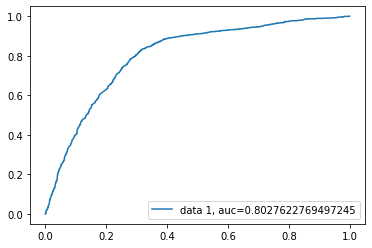

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]                                                                                                                                                                                                                                                                                                                                                                                                                                        m                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
predictions= logreg.predict(X_test)
ac = accuracy_score(y_test,predictions)
print(ac)

0.7765630757892151
